# CRISP DM

# Bussines Understanding

Masalah pada kasus ini adalah tentang informasi yang diperlukan untuk memprediksi apakah pasien terkena penyakit hati atau tidak. Penyakit hati dapat di prediksi melalui umur,jenis kelamin,nyeri dada,tekanan darah,kolesterol,sirosis hati,percepatan angiopati amiloid serebral,gula darah,istirahat,detak jantung maxsimum,latihan di induksi angina,depresi,keracunan jika memang pasien melebihi angka normal maka pasien di indentifikasikan terkena penyakit hati,jika pasien tidak melebihi angka normal maka pasien dinyatakan sehat tidak terkena penyakit hati

Dataset :(https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

# DATA UNDERSTANDING

Dari pengumpulan data yang telah diambil mengenai penyakit hati terdapat jumlah data diantaranya umur,jenis kelamin,nyeri dada,tekanan darah,kolesterol,sirosis hati,percepatan angiopati amiloid serebral,gula darah,istirahat,detak jantung maxsimum,latihan di induksi angina,depresi,keracunan,yang dapat memprediksi seseorang terkena penyakit hati atau tidak

1. Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n


In [1]:
import pandas as pd
import numpy as np


# Load DATASET

In [2]:
df = pd.read_csv('heart.csv')
df.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [3]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [6]:
numerical

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'slp',
 'caa',
 'thall',
 'output']

In [7]:
catgcols

['oldpeak']

In [8]:
ind_col = [col for col in df.columns if col != 'output']
dep_col = 'output'

In [9]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

# Transformasi Dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] =le.fit_transform(df[col])

In [11]:
df['output'] = le.fit_transform(df['output'])

In [12]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,22,0,0,1,1
1,37,1,2,130,250,0,1,187,0,32,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Membuat model decision tree

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.871900826446281
akurasi data testing = 0.7540983606557377 

confusion matrix : 
[[22  5]
 [10 24]]

classification report : 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.83      0.71      0.76        34

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



# Simulasi Model

In [17]:
input_data = (63, 1, 3,	145, 233, 1, 0,	150, 0, 23, 0, 0, 1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('orang terkena Penyakit hati')
else:
    print ('orang tidak terkena Penyakit hati')

[0]
orang tidak terkena Penyakit hati


C:\Users\Elman S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi pohon keputusan

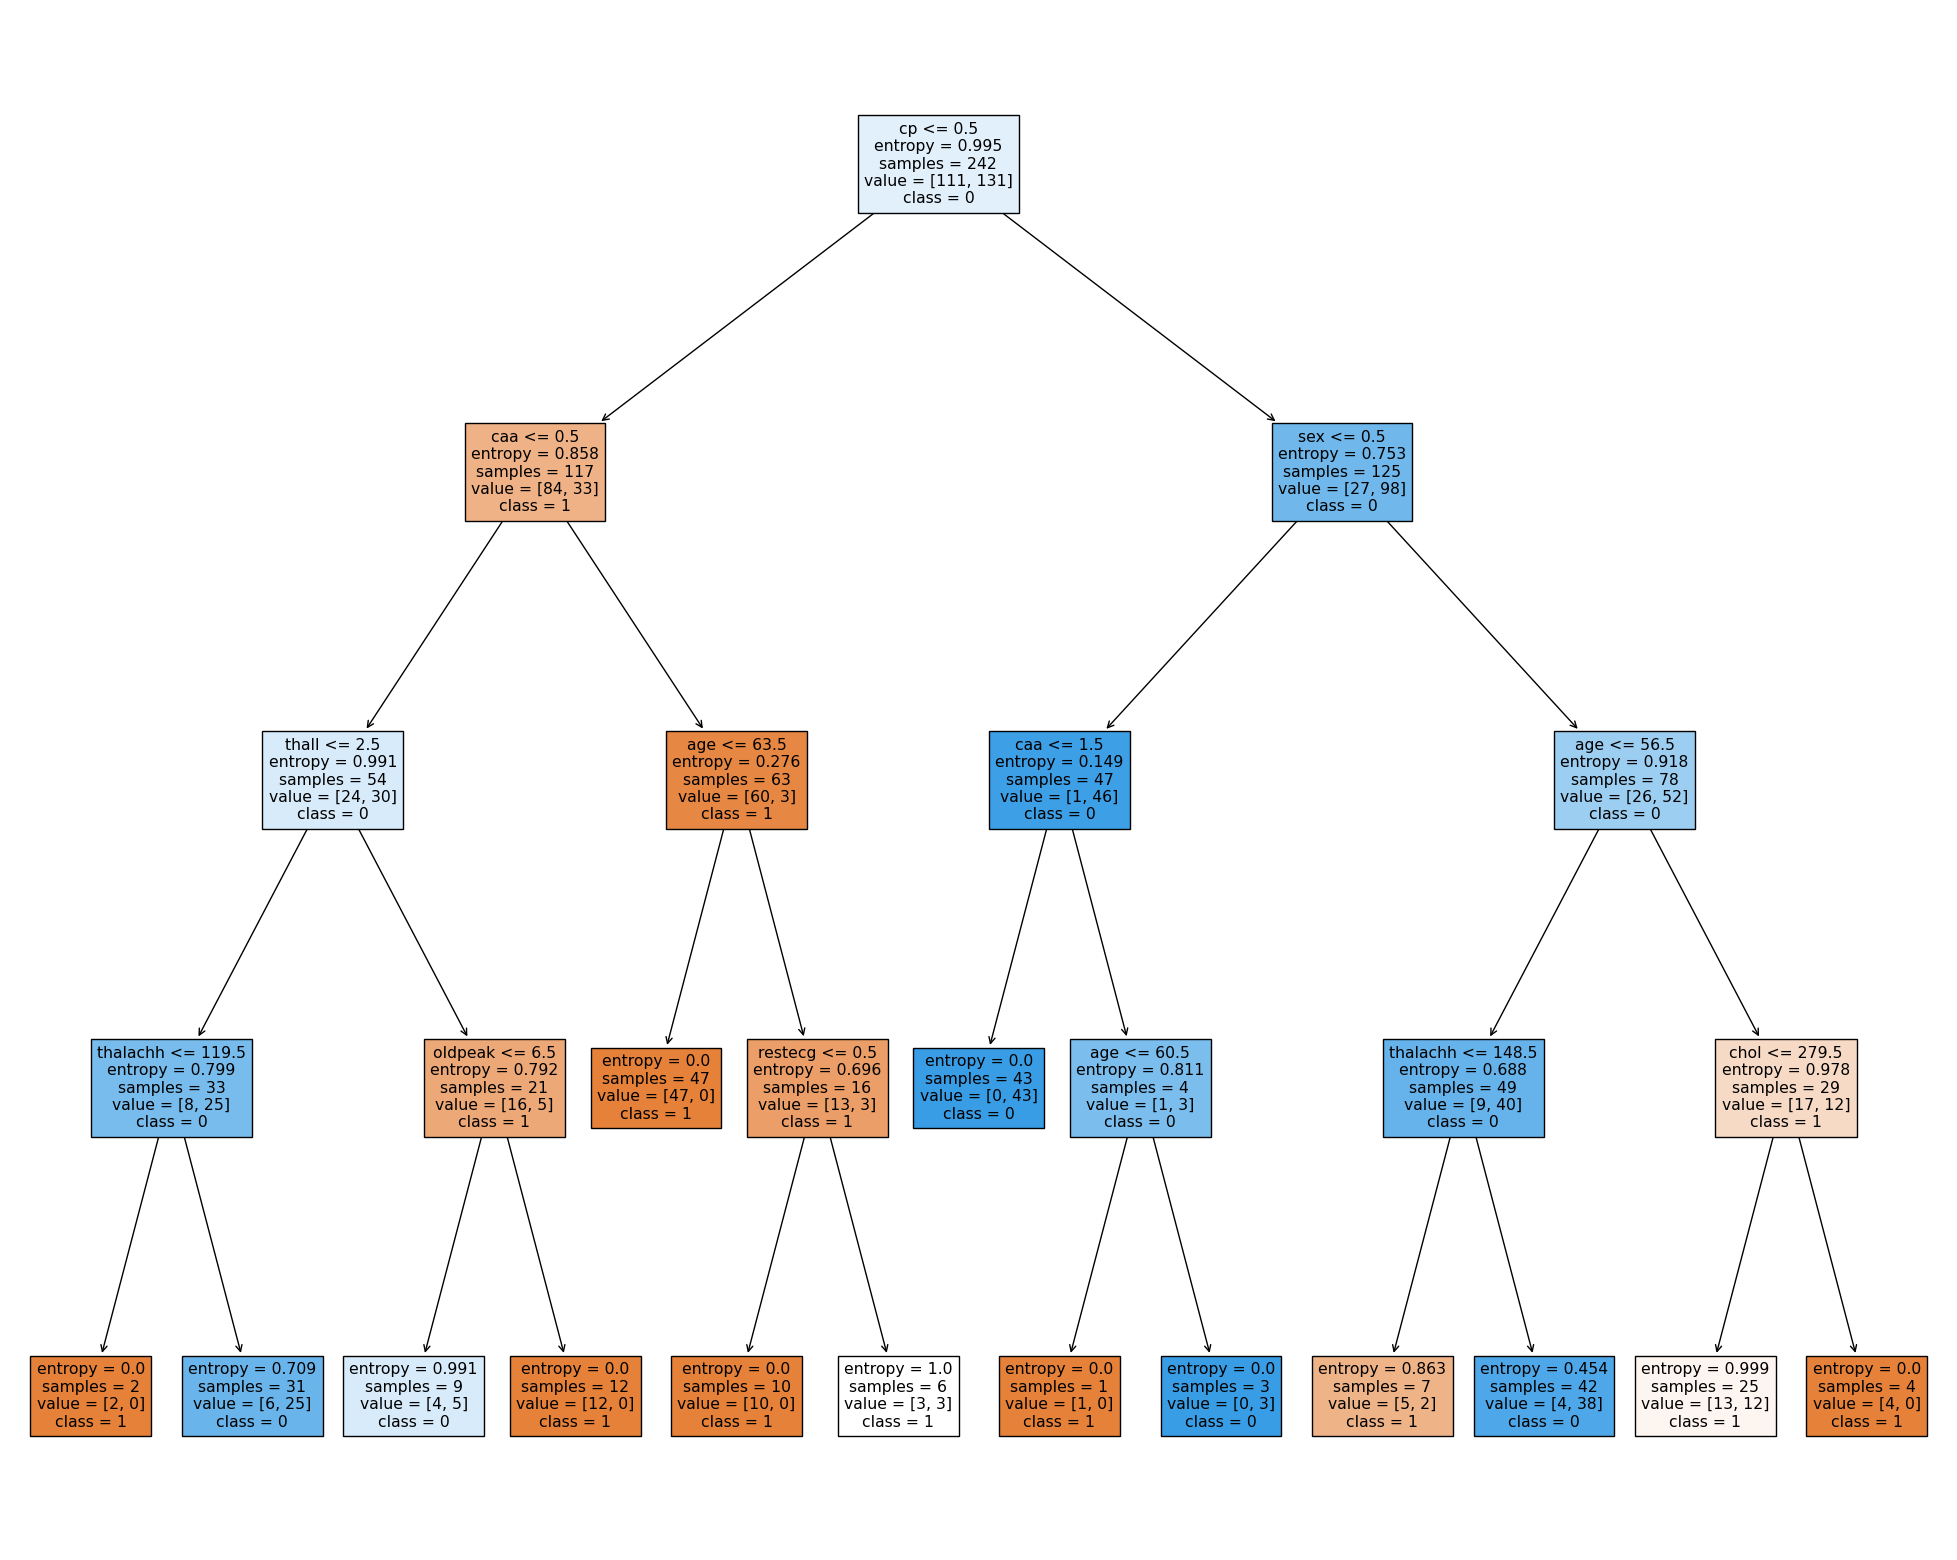

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['1','0'],
                   filled=True
                   )

# Save Model

In [20]:
import pickle

filename = 'heart.sav'
pickle.dump(model, open(filename, 'wb'))